# Case study 2: Student performance

## Objectives:
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
> - Gender
> - Test preparation course.
4. What do you think about the scoring variation for math, reading and writing based on
  > - Gender
  > - Test preparation course
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


### Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the students performance dataset

In [3]:
df = pd.read_csv("Data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### Performing general analysis

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Insights:
- The dataset appears not to have null values.
- The dataset has 8 columns and 1000 rows which covers three test scores,  namely math, reading and writing.

### 1. Number of male and female students who participated in the test.

In [4]:
print(df['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


518 female students and 482 male students participated in the test all together.

### 2. Insights on Parental level of education 

In [5]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

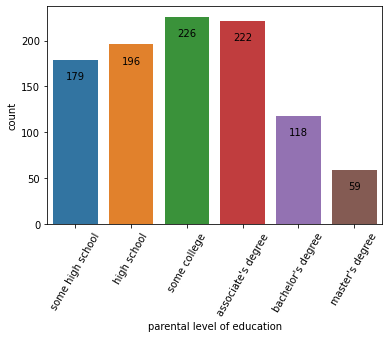

In [18]:
ax = sns.countplot(x='parental level of education', data=df)
plt.xticks(rotation=60)
rects = ax.patches
for bar in rects:
    y_value = bar.get_height()
    x_value = bar.get_x() + bar.get_width()/2
    ax.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')
plt.show()

In [141]:
df1 = df[['parental level of education', 'math score', 'reading score', 'writing score']].groupby('parental level of education').mean()
df1 = df1.reset_index()
df1.sort_values(by='parental level of education')

,parental level of education,math score,reading score,writing score
0,associate's degree,67.977477,71.018018,70.031532
1,bachelor's degree,69.288136,73.000000,73.381356
2,high school,61.821429,64.602041,62.403061
3,master's degree,70.254237,75.949153,75.677966
4,some college,67.128319,69.566372,69.035398
5,some high school,63.134078,66.759777,64.888268


#### Insights:
1. From the graph we can infer that majority of the parents have some college education.
2. Almost a similar number of parents possess an associate's degree.
3. Parents with a masters degree are a minortiy in the dataset.
4. Students whose parents have higher level of education seems to have better average scores perhaps due to better support at home too.
5. Majority of the parents in the group possess moderate levels of education ranging from high school to associate's degree

### 3. Analysis of average score based on:
> 1. Gender

In [80]:
df2 = df[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').mean()

In [81]:
df2 = df2.reset_index()
df2

,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


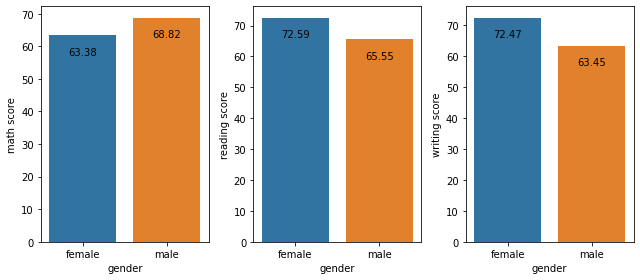

In [74]:
plt.figure(figsize=(9, 4))
# First figure
plt.subplot(1, 3, 1)
graph_1 = sns.barplot(x='gender', y='math score', data=df2)
rects1 = graph_1.patches
for bar in rects1:
    y_value = round(bar.get_height(), 2)
    x_value = bar.get_x() + bar.get_width()/2
    graph_1.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')

# Second figure
plt.subplot(1, 3, 2)
graph_2 = sns.barplot(x='gender', y='reading score', data=df2)
rects2 = graph_2.patches # getting bar id's
for bar in rects2:  # getting labels
    y_value = round(bar.get_height(), 2)
    x_value = bar.get_x() + bar.get_width()/2
    graph_2.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')

# Third figure
plt.subplot(1, 3, 3)
graph_3 = sns.barplot(x='gender', y='writing score', data=df2)
rects3 = graph_3.patches
for bar in rects3:
    y_value = round(bar.get_height(), 2)
    x_value = bar.get_x() + bar.get_width()/2
    graph_3.annotate(f'\n{y_value}', (x_value, y_value), va='top', ha='center')

plt.tight_layout()

#### Insights:
1. Male students have slightly higher average math score.
2. Female students lead the average scores in both reading and writing tests.

### 3. Analysis of average score based on:
> 2. Test preparation course attendance

In [121]:
df3 = df[['test preparation course', 'math score', 'reading score', 'writing score']].groupby('test preparation course').mean()
df3 = df3.reset_index()
df3

,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


#### Insights:
Those who completed the test preparation course performed consistently better in all the tests based on average scores. The test preparation course seems a worthwhile endeavour.

### 4. Scoring Variations based on:
> 1. Gender

In [133]:
df4 = df[['gender', 'math score', 'reading score', 'writing score']].groupby('gender').std()
df4 = df4.reset_index()
df4

,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


### 4. Scoring variation based on:
> 2. Test preparation course

In [134]:
df5 = df[['test preparation course', 'math score', 'reading score', 'writing score']].groupby('test preparation course').std()
df5 = df5.reset_index()
df5

,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


#### Insights:
1. Standard deviation is comparatively lower among those who completed the test preparation course; there must be less variation among their scores compared to those who didn't participate in the course.
2. Variation of scores across differrent tests is very low.
3. The high average scores and lower score variations among students who completed the test preparation course further reinforces our inferences in part 3. (2).

### 5. Giving bonus point to top 25% students in maths

In [113]:
df_math = df['math score']
df_math.quantile(0.75)

77.0

In [114]:
df['math score'].max()

100

By using quantiles and max, we see the top 25% or the students above 75th percentile has a score from 77 to 100.

In [115]:
df.loc[df['math score'] >= 77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


There are 255 students who scored more than 76 in math test. Their details range from index 414 to 999.

#### Bonus point:
As an example, we can attempt to give five bonus points to those indices having math score above 76.

In [116]:
df_copy = df.copy(deep=True)
df_copy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


Creating a deep copy of dataframe to work with safely.

In [117]:
df_copy['Bonus point'] = 0
for idx, score in enumerate(df_copy['math score']):
    if score >= 77:
        df_copy.loc[idx, 'Bonus point'] = 5

Using for loop and indexing we set only those values above 76 to recieve 5 bonus points. We have created a Bonus point table with zero as values beforehand. This will ensure those students having scores below 77 will not recieve bonus points.

In [119]:
df_copy.loc[df_copy['math score'] >= 77].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus point
414,female,group A,high school,free/reduced,completed,77,88,85,5
415,female,group B,master's degree,free/reduced,completed,77,97,94,5
416,female,group B,bachelor's degree,free/reduced,none,77,85,87,5
417,female,group B,master's degree,standard,none,77,90,84,5
418,female,group B,high school,standard,completed,77,82,89,5


In [120]:
df_copy.loc[df_copy['math score'] < 77].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus point
0,female,group C,some high school,free/reduced,none,0,17,10,0
1,female,group B,high school,free/reduced,none,8,24,23,0
2,female,group B,some high school,free/reduced,none,18,32,28,0
3,female,group B,some college,standard,none,11,38,32,0
4,female,group C,some college,free/reduced,none,22,39,33,0


We see that only students having score 77 and above in math recieved bonus points.

### Miscellaneous Analysis

In [138]:
df[['lunch', 'math score', 'reading score', 'writing score']].groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.600000,64.622535,63.067606
standard,70.074419,71.711628,70.899225


#### Insights:
The students who recieved free or reduced lunch did not perform as well as the students who recieved standard lunch. The lack of nourishment could be affecting student performance. Further study into the area is adviced.